# V71


In [3]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline 

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of Houses')

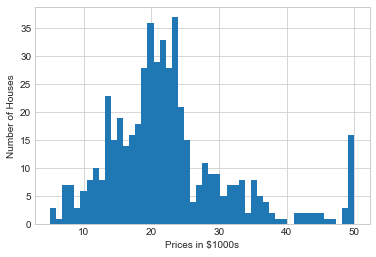

In [8]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0,0.5,'Number of rooms')

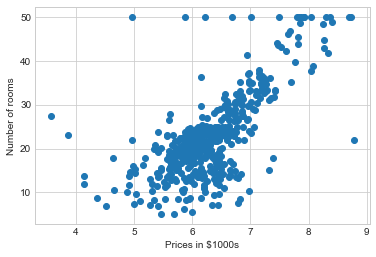

In [11]:
#scater plot :

plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of rooms')

In [20]:
boston_df = DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
boston_df['Prices']=boston.target

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


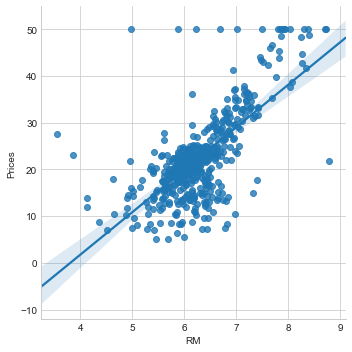

In [25]:
sns.lmplot('RM','Prices',data=boston_df)

# V72

In [49]:
X = boston_df.RM
X.shape


(506,)

In [50]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [51]:
Y=boston_df.Prices

In [52]:
X = np.array( [ [value,1] for value in X])
X 

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [54]:
X.shape

(506, 2)

In [61]:
 #n and b for best fit : 
m , b = np.linalg.lstsq(X,Y)[0]

/Users/raka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


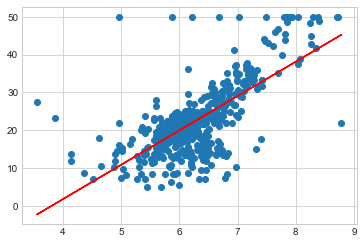

In [68]:
plt.plot(boston_df.RM,boston_df.Prices,'o')
x=boston_df.RM
plt.plot(x,m*x+b,'r',label="Best fit Line")

# V73

In [73]:
result= np.linalg.lstsq(X,Y)
error_total= result[1]
rmse= np.sqrt(error_total/len(X))
print("The root mean squared error was %.2f " %rmse)
#rmse => root mean square error

The root mean squared error was 6.60 


/Users/raka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [74]:
import sklearn 
from sklearn.linear_model import LinearRegression

In [75]:
lreg = LinearRegression()

In [76]:
# in order to drop the column we must pass the index 1 ??
X_multi = boston_df.drop('Prices',1)
Y_multi=boston_df.Prices

In [78]:
lreg.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [85]:
coeff_df= DataFrame(boston_df.columns)
coeff_df.columns= ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


# V73 Using Training and Validation

#### depricated 
sklearn does not automatically import its subpackages. If you only imported via: import sklearn, then it wont work. Import with import sklearn.cross_validation instead.
  



In [90]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Prices)

In [91]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


we use training set for prediction and testing set for validation of that prediction 

In [93]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [98]:
pred_train

array([16.94603325, 27.42323854, 23.86311707, 13.68581332, 18.36814699,
       13.90832092, 19.21948038, 30.8479206 ,  9.51621454, 22.50872304,
       19.07436674, 15.60131346, 19.09371522, 21.79282905, 19.03566976,
       20.08048802, 25.59480659, 24.72412471, 26.18493542, 23.25363976,
       15.85284378, 21.57032146, 31.11879941, 13.78255576, 14.96281341,
       16.61710899, 22.91504125, 18.9776243 , 21.49292751, 23.42777613,
       24.44357166, 20.61257139, 18.71641974, 39.46767121, 31.77664794,
       19.80960921, 21.50260176, 35.81080731, 20.68029109, 27.00724608,
       19.74188951, 33.85661021, 19.48068495, 23.56321554, 16.19144229,
       25.53676113, 22.53774577, 21.03823809, 19.63547284, 20.63191988,
       15.55294224, 23.8921398 , 20.92214717, 23.47614735, 19.2678516 ,
       26.78473849, 20.44810926, 16.67515444, 35.36579213, 18.43586669,
       29.19362503, 17.10082114, 19.5387304 , 18.96795006, 17.12016963,
       17.84573786, 21.31879114, 26.48483696, 25.05304898, 27.13

In [97]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 42.65
Fit a model X_train, and calculate MSE with X_test and Y_test: 47.51


In [100]:
#how should we know that the result is showing sth good or not ?
#=>:
    

Text(0.5,1,'Residual plot')

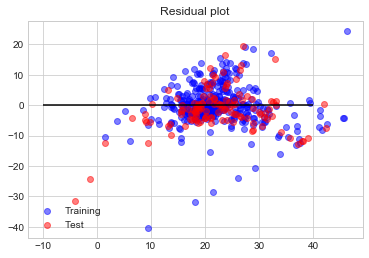

In [108]:
train=plt.scatter(pred_train,(pred_train- Y_train),c='b',alpha=0.5)
test=plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left') 
plt.title('Residual plot')


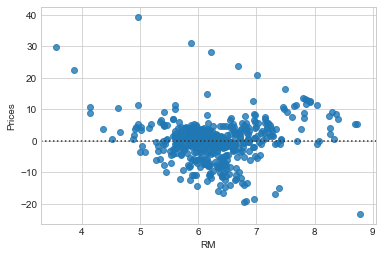

In [111]:
 #Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Prices', data = boston_df)